In [1]:
## Libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from tabulate import tabulate
import matplotlib.pyplot as plt
from scipy.stats import friedmanchisquare
from scipy.stats import wilcoxon
from scipy.stats import chi2
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.regression.mixed_linear_model import MixedLM
import pingouin as pg
import seaborn as sns
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from statsmodels.stats.sandwich_covariance import cov_cluster
from linearmodels import PanelOLS

In [2]:
## Import data
responses_df = pd.read_csv("/Users/acapp/Desktop/Engagement & Realism Responses.csv")

## Data Cleaning & Preparation

In [3]:
clean_responses_df = responses_df.drop(labels=[0,1], axis=0)

In [4]:
display(clean_responses_df)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,ChallengeV3,VarietyV3,ParticipantID,Condition1,Condition2,Condition3,Completed1,Completed2,Completed3,CurrentCondition
2,2025-04-21 22:00:30,2025-04-21 22:14:10,0,62.250.126.58,100,820,1,2025-04-21 22:14:11,R_8nNUFZqMTMJPdvP,NaN,...,6,9,P1401444,random,rule_based,ml,false,false,false,ml
3,2025-04-22 19:28:22,2025-04-22 19:44:52,0,79.8.71.232,100,990,1,2025-04-22 19:44:53,R_27Ny95Hdxz33z9y,NaN,...,4,7,P3477635,random,rule_based,ml,false,false,false,ml
4,2025-04-22 22:00:57,2025-04-22 22:10:04,0,87.11.221.112,100,546,1,2025-04-22 22:10:04,R_12VXHMc9wvtPfhX,NaN,...,5,9,P6221744,random,rule_based,ml,false,false,false,ml
5,2025-04-22 22:10:37,2025-04-22 22:27:07,0,37.251.49.138,100,989,1,2025-04-22 22:27:07,R_2E5tw8aACIIyfDP,NaN,...,3,9,P9154182,random,rule_based,ml,false,false,false,ml
6,2025-04-22 21:02:16,2025-04-22 22:41:32,0,62.250.126.58,100,5955,1,2025-04-22 22:41:32,R_7RX5v56l00ku6zb,NaN,...,5,7,P3472823,random,rule_based,ml,false,false,false,ml
7,2025-04-22 23:18:52,2025-04-22 23:33:08,0,87.208.27.193,100,856,1,2025-04-22 23:33:09,R_14MN3pbQYKnCM6J,NaN,...,4,9,P2181027,random,rule_based,ml,false,false,false,ml
8,2025-04-23 00:13:18,2025-04-23 00:18:11,0,62.250.126.58,100,293,1,2025-04-23 00:18:12,R_8OreGXXU1aVbNEs,NaN,...,5,9,P9851015,random,rule_based,ml,false,false,false,ml
9,2025-04-23 09:40:54,2025-04-23 09:51:25,0,104.28.30.83,100,631,1,2025-04-23 09:51:25,R_8PdyHTJKNmohv4e,NaN,...,5,11,P161089,random,rule_based,ml,false,false,false,ml
10,2025-04-23 00:10:54,2025-04-23 11:35:57,0,62.250.126.58,100,41102,1,2025-04-23 11:35:57,R_2U5w8r6rovg8f0j,NaN,...,5,9,P8554708,random,rule_based,ml,false,false,false,ml
11,2025-04-23 11:26:04,2025-04-23 11:55:45,0,92.109.255.41,100,1780,1,2025-04-23 11:55:45,R_2NEfupwNDSIcL7v,NaN,...,5,10,P2744460,random,rule_based,ml,false,false,false,ml


- Splitting the rows

In [5]:
## Identify the column names ending with each version denomination
condition1_cols = [col for col in clean_responses_df.columns if col.endswith('V1') or col.endswith('V1.1') ]

condition2_cols = [col for col in clean_responses_df.columns if col.endswith('V2') or col.endswith('V2.1')]

condition3_cols = [col for col in clean_responses_df.columns if col.endswith('V3') or col.endswith('V3.1')]

In [6]:
## Create a dataset per version
version1_df = clean_responses_df[['ParticipantID', 'Age','Gender','Gaming Knowledge','Gaming Time'] + condition1_cols].copy()

version2_df = clean_responses_df[['ParticipantID', 'Age','Gender','Gaming Knowledge','Gaming Time'] + condition2_cols].copy()

version3_df = clean_responses_df[['ParticipantID', 'Age','Gender','Gaming Knowledge','Gaming Time'] + condition3_cols].copy()

In [7]:
## Rename the columns to remove condition suffix
version1_df.columns = ['ParticipantID', 'Age','Gender','Gaming Knowledge','Gaming Time'] + [col.replace('V1', '') for col in condition1_cols]

version2_df.columns = ['ParticipantID', 'Age','Gender','Gaming Knowledge','Gaming Time'] + [col.replace('V2', '') for col in condition2_cols]

version3_df.columns = ['ParticipantID', 'Age','Gender','Gaming Knowledge','Gaming Time'] + [col.replace('V3', '') for col in condition3_cols]


In [8]:
## Add a condition identifier
version1_df['condition'] = 1 # Random

version2_df['condition'] = 2 # Rule-based

version3_df['condition'] = 3 # ML

In [9]:
## Adding information about the specific condition --> 1-Random, etc.
version1_df['condition_info'] = clean_responses_df['Condition1']

version2_df['condition_info'] = clean_responses_df['Condition2']

version3_df['condition_info'] = clean_responses_df['Condition3']

In [10]:
long_responses_df = pd.concat([version1_df, version2_df, version3_df], ignore_index=True)

In [11]:
## Recode Variety question
long_responses_df['Variety'] = long_responses_df['Variety'].astype(int)

variety_correct = {6:1,7:2, 8:3,
                   9:4, 10:5, 11:6, 12:7}

for row in range(len(long_responses_df)):
    for key, value in variety_correct.items():
        if long_responses_df.loc[long_responses_df.index[row], 'Variety'] == key:
            long_responses_df.loc[long_responses_df.index[row], 'Variety'] = value

## Altenrative approach: long_responses_df['Variety'] = long_responses_df['Variety'].replace(variety_correct)

In [12]:
display(long_responses_df)

,ParticipantID,Age,Gender,Gaming Knowledge,Gaming Time,Engagement,Realism,Engagement.1,Challenge,Variety,condition,condition_info
0,P1401444,23,2,3,1,3,3,3,6,3,1,random
1,P3477635,22,1,7,2,5,6,3,5,5,1,random
2,P6221744,21,1,6,2,4,5,2,3,2,1,random
3,P9154182,21,1,7,4,3,4,3,4,1,1,random
4,P3472823,21,1,7,1,5,6,6,5,4,1,random
...,...,...,...,...,...,...,...,...,...,...,...,...
145,P2892415,35,1,5,1,6,5,3,5,3,3,ml
146,P3213212,29,2,3,1,7,6,6,7,6,3,ml
147,P7626800,35,2,1,1,6,6,7,7,6,3,ml
148,P1167947,36,2,2,1,5,3,5,4,5,3,ml


## Data Exploration

- Data Type

In [13]:
long_responses_df.dtypes

ParticipantID       object
Age                 object
Gender              object
Gaming Knowledge    object
Gaming Time         object
Engagement          object
Realism             object
Engagement.1        object
Challenge           object
Variety              int64
condition            int64
condition_info      object
dtype: object

In [14]:
## Prepare data types function
def prepare_data(df):
    ## Convert ordinal variables to categorical with ordering 
    ordinal_vars = ['Engagement', 'Engagement.1', 'Realism', 'Challenge', 'Variety', 'Gaming Knowledge','Gaming Time', 'Age']

    for var in ordinal_vars:
        df[var] = pd.to_numeric(df[var], errors='coerce').astype(int)
    
    ## Convert categorical variables
    df['Gender'] = pd.Categorical(df['Gender'])
    df['condition_info'] = pd.Categorical(df['condition_info'], 
                                        categories=['random', 'rule_based', 'ml'],
                                        ordered=False)
    
    df['condition'] = pd.Categorical(df['condition'], ordered= True)

    ## Retain ParticipantID
    df['ParticipantID'] = df['ParticipantID']
    
    return df

In [15]:
prepared_responses_df = prepare_data(long_responses_df)

In [16]:
prepared_responses_df.dtypes

ParticipantID         object
Age                    int64
Gender              category
Gaming Knowledge       int64
Gaming Time            int64
Engagement             int64
Realism                int64
Engagement.1           int64
Challenge              int64
Variety                int64
condition           category
condition_info      category
dtype: object

In [17]:
display(prepared_responses_df)

,ParticipantID,Age,Gender,Gaming Knowledge,Gaming Time,Engagement,Realism,Engagement.1,Challenge,Variety,condition,condition_info
0,P1401444,23,2,3,1,3,3,3,6,3,1,random
1,P3477635,22,1,7,2,5,6,3,5,5,1,random
2,P6221744,21,1,6,2,4,5,2,3,2,1,random
3,P9154182,21,1,7,4,3,4,3,4,1,1,random
4,P3472823,21,1,7,1,5,6,6,5,4,1,random
...,...,...,...,...,...,...,...,...,...,...,...,...
145,P2892415,35,1,5,1,6,5,3,5,3,3,ml
146,P3213212,29,2,3,1,7,6,6,7,6,3,ml
147,P7626800,35,2,1,1,6,6,7,7,6,3,ml
148,P1167947,36,2,2,1,5,3,5,4,5,3,ml


## Dependent Variable Creation

- Engagement

In [18]:
## Measure concistency with Cronbach's alpha
engagement_df = prepared_responses_df[['Engagement','Engagement.1']]
alpha_result_engagement = pg.cronbach_alpha(data=engagement_df)

print(f"Cronbach's alpha: {alpha_result_engagement[0].round(3)}")

Cronbach's alpha: 0.825


In [19]:
## Aggregating by mean
prepared_responses_df['Engagement'] = prepared_responses_df['Engagement'].astype(int)
prepared_responses_df['Engagement.1'] = prepared_responses_df['Engagement.1'].astype(int)

prepared_responses_df['Engagement_DV1'] = prepared_responses_df[['Engagement', 'Engagement.1']].mean(axis=1).round(0)

prepared_responses_df['Engagement_DV1'] = pd.to_numeric(prepared_responses_df['Engagement_DV1'], errors='coerce').astype(int)

In [20]:
## Remove Engagement columns
prepared_responses_df = prepared_responses_df.drop(['Engagement','Engagement.1'], axis= 1)

- Realism

In [21]:
## Measure concistency with Cronbach's alpha
realism_df = prepared_responses_df[['Realism','Variety']]
alpha_result_realism = pg.cronbach_alpha(data=realism_df)

print(f"Cronbach's alpha: {alpha_result_realism[0].round(3)}")

Cronbach's alpha: 0.431


In [22]:
## Rename the other dependent variables
prepared_responses_df = prepared_responses_df.rename(columns = {
    'Realism': 'Realism_DV2',
    'Variety': 'Variety_DV3'
})

## Descriptive Statistics

In [23]:
## Temporary data frame to convert fields to numeric
prepared_responses_df_tmp = prepared_responses_df

## Drop meta columns
prepared_responses_df_tmp = prepared_responses_df_tmp.drop(['ParticipantID', 'condition_info'], axis=1)

## Converting fields to numeric
prepared_responses_df_tmp = prepared_responses_df_tmp.apply(pd.to_numeric, errors='coerce')

## Calculating summary statistics
summary_stats = prepared_responses_df_tmp.describe()

summary_stats_T = summary_stats.T.round(3)

print(tabulate(summary_stats_T, headers='keys', tablefmt='grid'))

+------------------+---------+--------+-------+-------+-------+-------+-------+-------+
|                  |   count |   mean |   std |   min |   25% |   50% |   75% |   max |
+==================+=========+========+=======+=======+=======+=======+=======+=======+
| Age              |     150 | 24.08  | 4.988 |    20 |    21 |    22 |    24 |    45 |
+------------------+---------+--------+-------+-------+-------+-------+-------+-------+
| Gender           |     150 |  1.34  | 0.475 |     1 |     1 |     1 |     2 |     2 |
+------------------+---------+--------+-------+-------+-------+-------+-------+-------+
| Gaming Knowledge |     150 |  4.5   | 1.809 |     1 |     3 |     5 |     6 |     7 |
+------------------+---------+--------+-------+-------+-------+-------+-------+-------+
| Gaming Time      |     150 |  1.72  | 1.043 |     1 |     1 |     1 |     2 |     5 |
+------------------+---------+--------+-------+-------+-------+-------+-------+-------+
| Realism_DV2      |     150 |  

In [24]:
## Distribution of IVs
variables = ['Gender','Gaming Knowledge', 'Gaming Time', 'Realism_DV2','Challenge','Variety_DV3','condition','Engagement_DV1']

for var in variables:
    print(prepared_responses_df[var].value_counts())
    print("\n")

Gender
1    99
2    51
Name: count, dtype: int64


Gaming Knowledge
3    27
7    27
6    27
2    24
5    24
4    18
1     3
Name: count, dtype: int64


Gaming Time
1    84
2    42
3    12
4     6
5     6
Name: count, dtype: int64


Realism_DV2
6    43
5    40
3    19
4    19
2    19
7     6
1     4
Name: count, dtype: int64


Challenge
5    60
6    27
4    20
2    19
3    14
7    10
Name: count, dtype: int64


Variety_DV3
5    44
6    41
4    22
3    16
2    16
7     9
1     2
Name: count, dtype: int64


condition
1    50
2    50
3    50
Name: count, dtype: int64


Engagement_DV1
6    46
4    41
5    29
3    15
2    15
7     3
1     1
Name: count, dtype: int64




## Model Preparation

In [25]:
# ## Define Likert scale mapping
# likert_mapping = {
#     1: 'Strongly Disagree',
#     2: 'Disagree',
#     3: 'Somewhat Disagree',
#     4: 'Neutral',
#     5: 'Somewhat Agree',
#     6: 'Agree',
#     7: 'Strongly Agree'
# }

# ## Define gender scale mapping
# gender_mapping = {
#     1: 'male',
#     2: 'female',
#     3: 'other'
# }

# ## Define gaming time scale mapping
# gaming_time_mapping = {
#     1: '0-5',
#     2:'6-10',
#     3: '11-15',
#     4: '16-20',
#     5: '20+'
# }

# ## Define gaming knowledge scale mapping
# gaming_knowledge_mapping = {
#     1: 'Novice',
#     2: 'Newcomer',
#     3: 'Learner',
#     4: 'Competent',
#     5: 'Advanced',
#     6: 'Proficient',
#     7: 'Expert'
# }

## Define condition scale mapping
condition_mapping = {
    1: 'Random',
    2: 'Rule-based',
    3: 'Machine-learning'
}

In [26]:
## Map the condition with the apporpriate names
prepared_responses_df['condition'] = prepared_responses_df['condition'].map(condition_mapping)

In [27]:
## Get dummies for conditions
condition_dummies = pd.get_dummies(prepared_responses_df['condition'], prefix= 'condition')

## Concatenate
prepared_responses_df = pd.concat([prepared_responses_df, condition_dummies], axis=1)

## Drop condition related variables
prepared_responses_df.drop(['condition_info', 'condition'], axis= 1, inplace= True)

## Make a copy
prepared_df = prepared_responses_df.copy()

In [28]:
## Show the column names
print("Created dummy variables:")
for col in prepared_df.columns:
    print(col)

Created dummy variables:
ParticipantID
Age
Gender
Gaming Knowledge
Gaming Time
Realism_DV2
Challenge
Variety_DV3
Engagement_DV1
condition_Random
condition_Rule-based
condition_Machine-learning


In [29]:
prepared_df

,ParticipantID,Age,Gender,Gaming Knowledge,Gaming Time,Realism_DV2,Challenge,Variety_DV3,Engagement_DV1,condition_Random,condition_Rule-based,condition_Machine-learning
0,P1401444,23,2,3,1,3,6,3,3,True,False,False
1,P3477635,22,1,7,2,6,5,5,4,True,False,False
2,P6221744,21,1,6,2,5,3,2,3,True,False,False
3,P9154182,21,1,7,4,4,4,1,3,True,False,False
4,P3472823,21,1,7,1,6,5,4,6,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
145,P2892415,35,1,5,1,5,5,3,4,False,False,True
146,P3213212,29,2,3,1,6,7,6,6,False,False,True
147,P7626800,35,2,1,1,6,7,6,6,False,False,True
148,P1167947,36,2,2,1,3,4,5,5,False,False,True


In [30]:
prepared_df.dtypes

ParticipantID                   object
Age                              int64
Gender                        category
Gaming Knowledge                 int64
Gaming Time                      int64
Realism_DV2                      int64
Challenge                        int64
Variety_DV3                      int64
Engagement_DV1                   int64
condition_Random                  bool
condition_Rule-based              bool
condition_Machine-learning        bool
dtype: object

## Hypothesis Testing

### Hypothessi I (Firedman & Wilcoxon)

In [31]:
condition1_df = prepared_df.loc[prepared_df['condition_Random'] == 1]
condition2_df = prepared_df.loc[prepared_df['condition_Rule-based'] == 1]
condition3_df = prepared_df.loc[prepared_df['condition_Machine-learning'] == 1]

- DV 1: Engagement

In [32]:
## Friedman Test
friedman_test_DV1 = friedmanchisquare(
    condition1_df['Engagement_DV1'],
    condition2_df['Engagement_DV1'],
    condition3_df['Engagement_DV1']
)

print("\nFriedman test statistic:", friedman_test_DV1.statistic)
print("Friedman test p-value:", friedman_test_DV1.pvalue)


Friedman test statistic: 26.17808219178084
Friedman test p-value: 2.0677673743092326e-06


In [33]:
## Wilcoxon Test
## Data prep
condition1_values = condition1_df['Engagement_DV1']
condition2_values = condition2_df['Engagement_DV1']
condition3_values = condition3_df['Engagement_DV1']

## Perform pairwise Wilcoxon tests
## Condition 1 vs Condition 2
wilcoxon_1_2 = wilcoxon(condition1_values, condition2_values)
print("Wilcoxon test (Condition 1 vs 2):")
print("Statistic:", wilcoxon_1_2.statistic)
print("p-value:", wilcoxon_1_2.pvalue)

## Condition 1 vs Condition 3
wilcoxon_1_3 = wilcoxon(condition1_values, condition3_values)
print("\nWilcoxon test (Condition 1 vs 3):")
print("Statistic:", wilcoxon_1_3.statistic)
print("p-value:", wilcoxon_1_3.pvalue)

## Condition 2 vs Condition 3
wilcoxon_2_3 = wilcoxon(condition2_values, condition3_values)
print("\nWilcoxon test (Condition 2 vs 3):")
print("Statistic:", wilcoxon_2_3.statistic)
print("p-value:", wilcoxon_2_3.pvalue)

Wilcoxon test (Condition 1 vs 2):
Statistic: 120.5
p-value: 0.0006112252214317845

Wilcoxon test (Condition 1 vs 3):
Statistic: 107.5
p-value: 2.0864114060026898e-05

Wilcoxon test (Condition 2 vs 3):
Statistic: 118.0
p-value: 0.13358869424861658


- DV 2: Realism

In [34]:
## Friedman Test
friedman_test_DV1 = friedmanchisquare(
    condition1_df['Realism_DV2'],
    condition2_df['Realism_DV2'],
    condition3_df['Realism_DV2']
)

print("\nFriedman test statistic:", friedman_test_DV1.statistic)
print("Friedman test p-value:", friedman_test_DV1.pvalue)


Friedman test statistic: 9.961538461538439
Friedman test p-value: 0.006868776850292433


In [35]:
## Wilcoxon Test
## Data prep
condition1_values = condition1_df['Realism_DV2']
condition2_values = condition2_df['Realism_DV2']
condition3_values = condition3_df['Realism_DV2']

## Perform pairwise Wilcoxon tests
## Condition 1 vs Condition 2
wilcoxon_1_2 = wilcoxon(condition1_values, condition2_values)
print("Wilcoxon test (Condition 1 vs 2):")
print("Statistic:", wilcoxon_1_2.statistic)
print("p-value:", wilcoxon_1_2.pvalue)

## Condition 1 vs Condition 3
wilcoxon_1_3 = wilcoxon(condition1_values, condition3_values)
print("\nWilcoxon test (Condition 1 vs 3):")
print("Statistic:", wilcoxon_1_3.statistic)
print("p-value:", wilcoxon_1_3.pvalue)

## Condition 2 vs Condition 3
wilcoxon_2_3 = wilcoxon(condition2_values, condition3_values)
print("\nWilcoxon test (Condition 2 vs 3):")
print("Statistic:", wilcoxon_2_3.statistic)
print("p-value:", wilcoxon_2_3.pvalue)

Wilcoxon test (Condition 1 vs 2):
Statistic: 130.0
p-value: 0.0007386842647552933

Wilcoxon test (Condition 1 vs 3):
Statistic: 171.0
p-value: 0.0019992989667593874

Wilcoxon test (Condition 2 vs 3):
Statistic: 257.5
p-value: 0.4865148344207262


- DV 3: Variety

In [36]:
## Friedman Test
friedman_test_DV1 = friedmanchisquare(
    condition1_df['Variety_DV3'],
    condition2_df['Variety_DV3'],
    condition3_df['Variety_DV3']
)

print("\nFriedman test statistic:", friedman_test_DV1.statistic)
print("Friedman test p-value:", friedman_test_DV1.pvalue)


Friedman test statistic: 3.8741258741258484
Friedman test p-value: 0.1441266377492399


In [37]:
## Wilcoxon Test
## Data prep
condition1_values = condition1_df['Variety_DV3']
condition2_values = condition2_df['Variety_DV3']
condition3_values = condition3_df['Variety_DV3']

## Perform pairwise Wilcoxon tests
## Condition 1 vs Condition 2
wilcoxon_1_2 = wilcoxon(condition1_values, condition2_values)
print("Wilcoxon test (Condition 1 vs 2):")
print("Statistic:", wilcoxon_1_2.statistic)
print("p-value:", wilcoxon_1_2.pvalue)

## Condition 1 vs Condition 3
wilcoxon_1_3 = wilcoxon(condition1_values, condition3_values)
print("\nWilcoxon test (Condition 1 vs 3):")
print("Statistic:", wilcoxon_1_3.statistic)
print("p-value:", wilcoxon_1_3.pvalue)

## Condition 2 vs Condition 3
wilcoxon_2_3 = wilcoxon(condition2_values, condition3_values)
print("\nWilcoxon test (Condition 2 vs 3):")
print("Statistic:", wilcoxon_2_3.statistic)
print("p-value:", wilcoxon_2_3.pvalue)

Wilcoxon test (Condition 1 vs 2):
Statistic: 280.5
p-value: 1.0

Wilcoxon test (Condition 1 vs 3):
Statistic: 274.5
p-value: 0.15312904316637418

Wilcoxon test (Condition 2 vs 3):
Statistic: 121.5
p-value: 0.030358372151657268


### Hypothessi I (Mixed Effects Models)

Descriptive Statistics

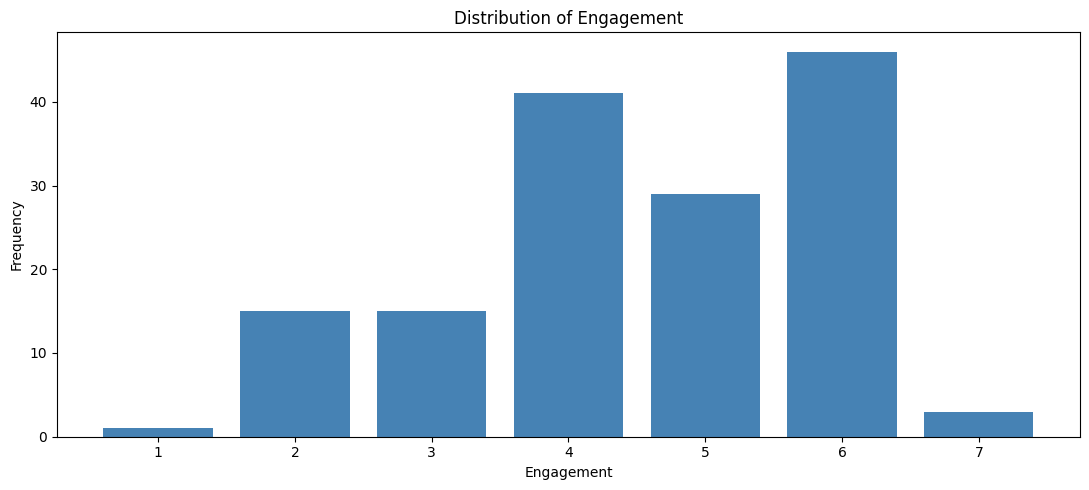

In [38]:
## Engagement_DV1 distribution
## Calculate counts per category
counts = prepared_df['Engagement_DV1'].value_counts()

## Plot as bar chart
plt.figure(figsize=(11,5))
plt.bar(counts.index, counts.values, color = 'steelblue')

## Labelling
plt.xlabel('Engagement')
plt.ylabel('Frequency')
plt.title('Distribution of Engagement')

## Additional settings
plt.tight_layout()
plt.style.use('ggplot')
plt.show()

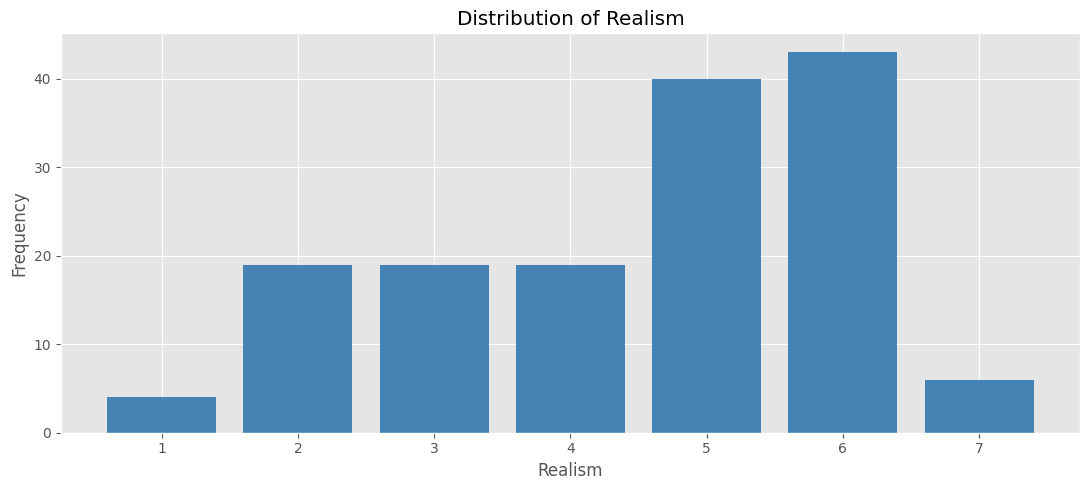

In [39]:
## Realism_DV2 distribution
## Calculate counts per category
counts = prepared_df['Realism_DV2'].value_counts()

## Plot as bar chart
plt.figure(figsize=(11,5))
plt.bar(counts.index, counts.values, color = 'steelblue')

## Labelling
plt.xlabel('Realism')
plt.ylabel('Frequency')
plt.title('Distribution of Realism')

## Additional settings
plt.tight_layout()
plt.style.use('ggplot')
plt.show()

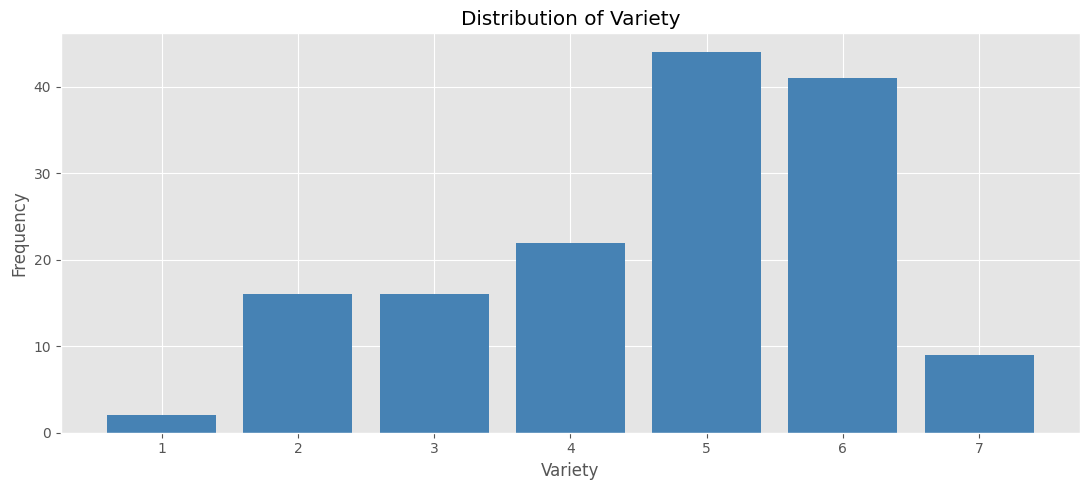

In [40]:
## Variety_DV3 distribution
## Calculate counts per category
counts = prepared_df['Variety_DV3'].value_counts()

## Plot as bar chart
plt.figure(figsize=(11,5))
plt.bar(counts.index, counts.values, color = 'steelblue')

## Labelling
plt.xlabel('Variety')
plt.ylabel('Frequency')
plt.title('Distribution of Variety')

## Additional settings
plt.tight_layout()
plt.style.use('ggplot')
plt.show()

### Model Specification

In [41]:
X = prepared_df.drop(['Realism_DV2','Variety_DV3','Engagement_DV1','ParticipantID'],axis=1).astype(int)

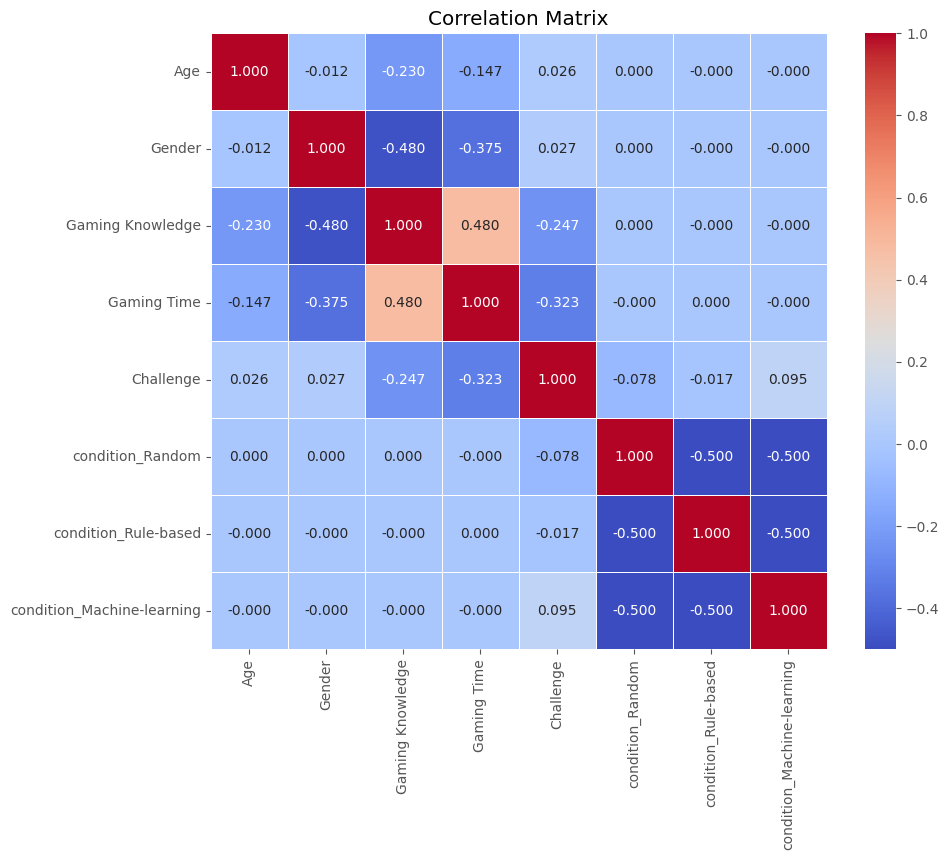

In [42]:
## Correlation matrix
plt.figure(figsize=(10,8))

corr = X.corr(numeric_only= True)

sns.heatmap(corr, cmap='coolwarm', annot= True,
            linewidths= 0.5, linecolor= 'white', square= True,
            fmt = '.3f')

plt.title("Correlation Matrix")
plt.show()

In [43]:
## Standardize variables causing multicollinearity
for var in ['Challenge', 'Gaming Knowledge']:
    if var in X.columns:
        X[f'{var}_std'] = (X[var] - X[var].mean()) / X[var].std()

## Drop the original ones
X.drop([ 'Gaming Knowledge', 'Challenge'], axis= 1, inplace= True)

In [44]:
## Drop one condition as its the one of reference (Rule_based)
X.drop(['condition_Rule-based'], axis= 1, inplace= True)

In [45]:
X.columns

Index(['Age', 'Gender', 'Gaming Time', 'condition_Random',
       'condition_Machine-learning', 'Challenge_std', 'Gaming Knowledge_std'],
      dtype='object')

Model Fitting

In [46]:
## Fixed effects model
def fixed_effects_model(iv,dv,df,tvv = True):
    ## Renaming the variables
    iv = iv.rename(columns = {'Gaming Knowledge_std': 'Gaming_Knowledge_std', 
                            'condition_Machine-learning': 'condition_Machine_learning'})
    ## Get dummies
    participant_dummies = pd.get_dummies(df['ParticipantID'], prefix= 'participant', drop_first= True)

    ## If we only look at time-varying variables
    if tvv == True:
        time_varying_vars = ['condition_Random', 'condition_Machine_learning','Challenge_std']
        iv_tvv = iv[time_varying_vars]
        X_with_fe = pd.concat([iv_tvv,participant_dummies], axis=1)

    elif tvv == False:
        X_with_fe = pd.concat([iv,participant_dummies], axis=1)

    ## Transform all to int
    X_with_fe = X_with_fe.apply(pd.to_numeric, errors = 'coerce').astype(float)

    ## Fit the model
    model_fe = sm.OLS(dv,X_with_fe)
    results = model_fe.fit()
    return results

In [47]:
## Random Effects Model
def random_effects_model(iv, dv, df, tvv = True):
    ## Rename the columns
    iv = iv.rename(columns = {'Gaming Knowledge_std': 'Gaming_Knowledge_std', 
                              'condition_Machine-learning': 'condition_Machine_learning'})
    
    ## ensure predictors and outcome are numeric
    iv = iv.apply(pd.to_numeric, errors='coerce').astype(float)
    y = pd.to_numeric(dv, errors='coerce').astype(float)

    ## insert constant at position 0
    iv.insert(0, 'constant', 1.0)

    ## If we only look at time-varying variables
    if tvv == True:
        time_varying_vars = ['condition_Random', 'condition_Machine_learning','Challenge_std']
        iv_tvv = iv[time_varying_vars]

        ## fit the random‐intercepts model with only time varying variables
        model_re = MixedLM(endog=y,
                        exog=iv_tvv,
                        groups=np.array(df['ParticipantID']))
    elif tvv == False:
        ## fit the random‐intercepts model
        model_re = MixedLM(endog=y,
                        exog=iv,
                        groups=np.array(df['ParticipantID']))
    
    results = model_re.fit()
    return results

In [48]:
## Hausman Test
def hausman_test(fe_results, re_results):
    # Extract coefficients and covariance matrices
    b_fe = fe_results.params
    b_re = re_results.params
    
    # Calculate common coefficients
    common_coef = [c for c in b_fe.index if c in b_re.index]
    
    # Extract variance matrices
    v_fe = fe_results.cov_params()
    v_re = re_results.cov_params()
    
    # Calculate test statistic
    diff = b_fe[common_coef] - b_re[common_coef]
    var_diff = v_fe.loc[common_coef, common_coef] - v_re.loc[common_coef, common_coef]
    
    # Hausman test statistic
    h_stat = diff.T @ np.linalg.inv(var_diff) @ diff
    df = len(common_coef)
    p_value = 1 - stats.chi2.cdf(h_stat, df)

    print("Hausman Test Results:")
    print(f"\nHausman Test Statistic: {h_stat.round(4)}")
    print(f"Hausman Test p-value: {p_value.round(4)}")

    ## Interpretation
    print("\nInterpretation:")
    if p_value > 0.05:
        print("The null is not rejected in favor of the Random Effects model")
    else:
        print("The null hypothesis is rejected in favor of the Fixed Effects model")
    
    return h_stat, p_value

In [49]:
## Test normality assumption with Q-Q Plot and Shapiro-Wilk Test
def test_normality(model):
    ## Extract residuals
    residuals = model.resid
    
    ## Plotting Settings
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    ## Plot 1: Q-Q plot of Residuls
    qqplot(residuals, line='s', ax=ax1)
    ax1.set_title('Q-Q Plot of Residuals')
    
    ## Plot 2: Histogram with normal curve
    sns.histplot(residuals, kde=True, ax=ax2)
    ax2.set_title('Histogram of Residuals')
    
    plt.style.use('ggplot')
    plt.tight_layout()
    plt.show()
    
    ## Shapiro-Wilk test:
    shapiro_test = stats.shapiro(residuals)
    print(f"Shapiro-Wilk Test:")
    print(f"\nW Statistic: {shapiro_test[0].round(4)}")
    print(f"p-value: {shapiro_test[1].round(4)}")

    ## Extracting the interpretation
    if shapiro_test[1] < 0.05:
        print("\nThe residuals do not appear to be normally distributed (p < 0.05)")
    else:
        print("\nThe residuals appear to be normally distributed (p > 0.05)")
    
    ## Jarque-Bera Test
    jb_test = stats.jarque_bera(residuals)
    print(f"\nJarque-Bera Test:")
    print(f"\nJB Statistic: {jb_test[0].round(4)}")
    print(f"p-value: {jb_test[1].round(4)}")

    
    if jb_test[1] < 0.05:
        print("\nThe residuals do not appear to be normally distributed (p < 0.05)")
    else:
        print("\nThe residuals appear to be normally distributed (p > 0.05)")

    print("\nSkewness and Kurtosis:")
    print(f"Skewness: {stats.skew(residuals)}")
    print(f"Kurtosis: {stats.kurtosis(residuals)}")

    results_dict = {
        "Shapiro_Wilk Test": shapiro_test,
        "Jarque_Bera Test": jb_test
    }

    return results_dict

In [50]:
## Test homoscedasticity with BP test and residual vs fitted plots
def test_homoscedasticity(model):

    ## Extract residuals and fitted values
    residuals = model.resid
    fitted_values = model.fittedvalues
    
    ## Create standardized residuals
    std_resid = residuals / np.std(residuals)
    abs_std_resid = np.abs(std_resid)
    sqrt_std_resid = np.sqrt(abs_std_resid)

    ## Plot Setting
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    ## Plot 1: Residuals vs Fitted plot
    ax1.scatter(fitted_values, residuals, alpha=0.5, color = 'steelblue')
    ax1.axhline(y=0, color='black', linestyle='--')
    ax1.set_title('Residuals vs Fitted Values')
    ax1.set_xlabel('Fitted Values')
    ax1.set_ylabel('Residuals')
    
    ## Add a smoothed line to better visualize patterns
    smoothed = sm.nonparametric.lowess(residuals, fitted_values, frac=0.9)
    ax1.plot(smoothed[:, 0], smoothed[:, 1], 'r-', lw=2)
    
    ## Plot 2: Scale-Location plot (sqrt of standardized residuals vs fitted values)
    ax2.scatter(fitted_values, sqrt_std_resid, alpha=0.5, color = 'steelblue')
    ax2.set_title('Scale-Location Plot')
    ax2.set_xlabel('Fitted Values')
    ax2.set_ylabel('Squared Standardized Residuals')
    
    ## Add a smoothed line
    smoothed = sm.nonparametric.lowess(sqrt_std_resid, fitted_values, frac= 0.9)
    ax2.plot(smoothed[:, 0], smoothed[:, 1], 'r-', lw=2)
    
    plt.style.use('ggplot')
    plt.tight_layout()
    plt.show()
    
    ## Breusch-Pagan test for heteroscedasticity
    vars = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
    bp_test = sms.het_breuschpagan(residuals, model.model.exog)
    
    ## Print results in a readable format
    bp_dict = dict(lzip(vars, bp_test))
    print(f"Breusch-Pagan Test Results:")
    print(f"Lagrange multiplier statistic: {bp_dict['Lagrange multiplier statistic'].round(4)}")
    print(f"p-value: {bp_dict['p-value'].round(4)}")
    
    if bp_dict['p-value'] < 0.05:
        print("Evidence of heteroscedasticity (p < 0.05)")
    else:
        print("No significant evidence of heteroscedasticity (p > 0.05)")
    
    return bp_test

- DV1: Engagement 

In [51]:
## Fixed-Effects Model
engagement_fe_results = fixed_effects_model(X,prepared_df['Engagement_DV1'],prepared_df, tvv= True)

## Random-Effects Model
engagement_re_results = random_effects_model(X,prepared_df['Engagement_DV1'], prepared_df, tvv= True)

## Hausman Test
hausman_test_engagement = hausman_test(engagement_fe_results,engagement_re_results)

Hausman Test Results:

Hausman Test Statistic: 1.7348
Hausman Test p-value: 0.6292

Interpretation:
The null is not rejected in favor of the Random Effects model


In [52]:
## Refitting to include time-invarying varibles
engagement_re_results = random_effects_model(X,prepared_df['Engagement_DV1'], prepared_df, tvv= False)
print(engagement_re_results.summary())

                Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    Engagement_DV1
No. Observations:    150        Method:                REML          
No. Groups:          50         Scale:                 0.7331        
Min. group size:     3          Log-Likelihood:        -224.6223     
Max. group size:     3          Converged:             Yes           
Mean group size:     3.0                                             
---------------------------------------------------------------------
                           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------
constant                    6.101    0.910  6.706 0.000  4.318  7.884
Age                        -0.036    0.026 -1.363 0.173 -0.088  0.016
Gender                     -0.253    0.315 -0.803 0.422 -0.872  0.365
Gaming Time                -0.092    0.144 -0.639 0.523 -0.375  0.191
condition_Random           -0.746   

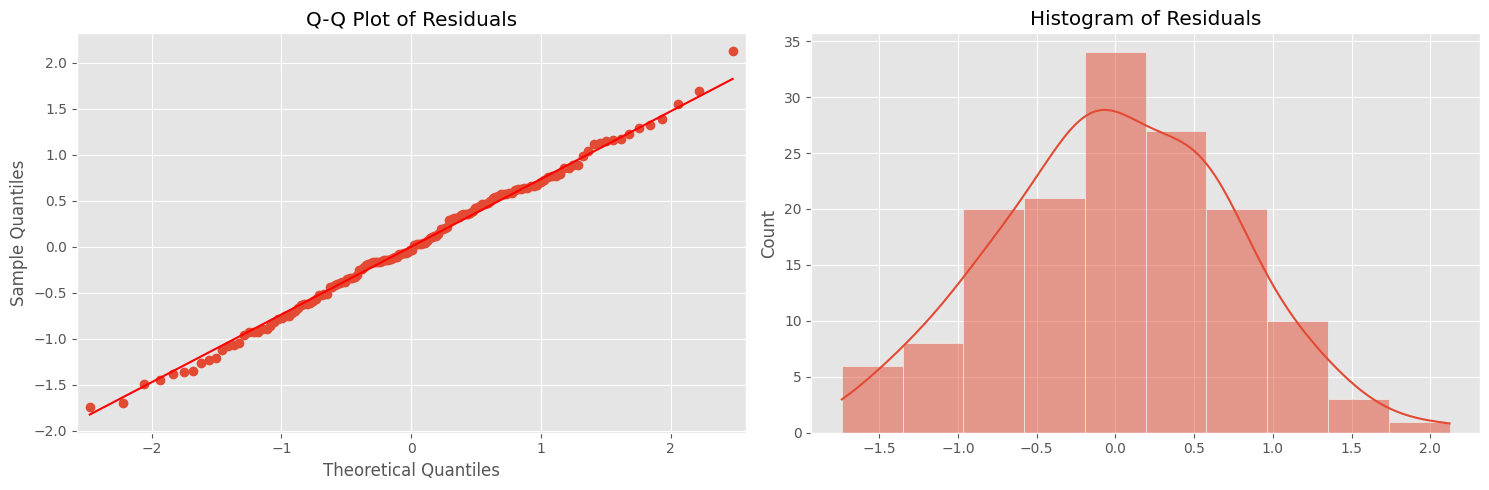

Shapiro-Wilk Test:

W Statistic: 0.9956
p-value: 0.938

The residuals appear to be normally distributed (p > 0.05)

Jarque-Bera Test:

JB Statistic: 0.334
p-value: 0.8462

The residuals appear to be normally distributed (p > 0.05)

Skewness and Kurtosis:
Skewness: 0.007399350754445648
Kurtosis: -0.23069267378671743


In [53]:
normality_engagement = test_normality(engagement_re_results)

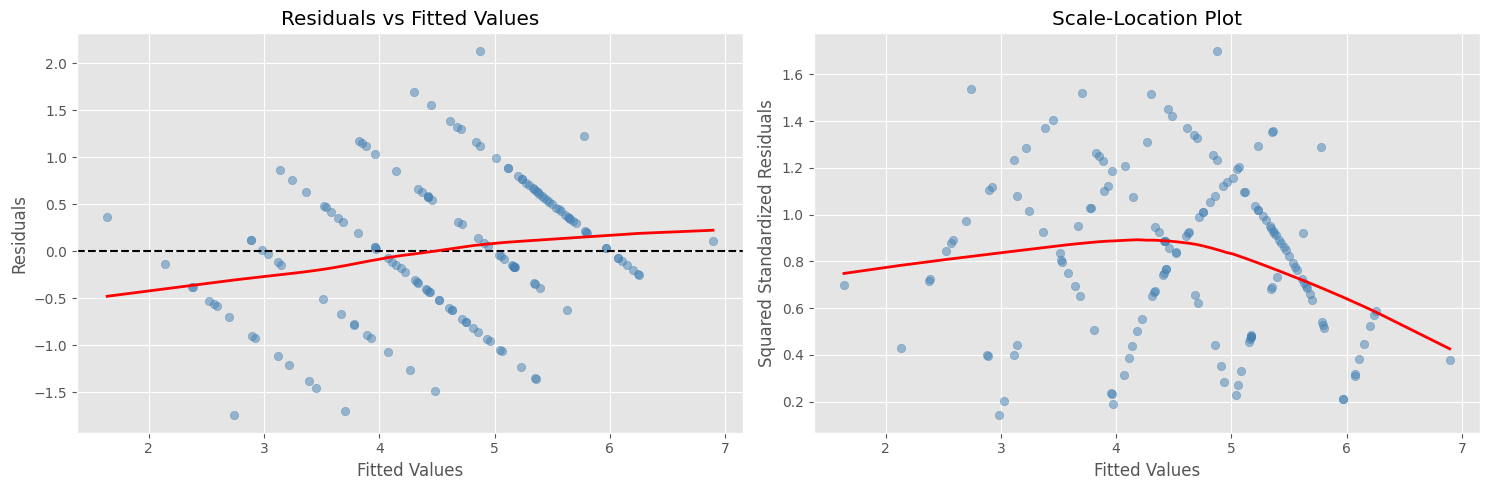

Breusch-Pagan Test Results:
Lagrange multiplier statistic: 5.6379
p-value: 0.5826
No significant evidence of heteroscedasticity (p > 0.05)


In [54]:
homoscedasticity_engagement = test_homoscedasticity(engagement_re_results)

- DV2: Realism

In [55]:
## Fixed-Effects Model
realism_fe_results = fixed_effects_model(X,prepared_df['Realism_DV2'],prepared_df, tvv= True)

## Random-Effects Model
realism_re_results = random_effects_model(X,prepared_df['Realism_DV2'], prepared_df, tvv= True)

## Hausman Test
hausman_test_realism = hausman_test(realism_fe_results, realism_re_results)

Hausman Test Results:

Hausman Test Statistic: 3.5295
Hausman Test p-value: 0.317

Interpretation:
The null is not rejected in favor of the Random Effects model


In [56]:
## Random-Effects Model
realism_re_results = random_effects_model(X,prepared_df['Realism_DV2'], prepared_df, tvv= False)

print(realism_re_results.summary())

                Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     Realism_DV2
No. Observations:     150         Method:                 REML       
No. Groups:           50          Scale:                  1.6724     
Min. group size:      3           Log-Likelihood:         -266.1740  
Max. group size:      3           Converged:              Yes        
Mean group size:      3.0                                            
---------------------------------------------------------------------
                           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------
constant                    4.561    0.950  4.801 0.000  2.699  6.424
Age                        -0.026    0.027 -0.947 0.344 -0.079  0.028
Gender                      0.318    0.327  0.973 0.331 -0.323  0.958
Gaming Time                 0.331    0.150  2.198 0.028  0.036  0.626
condition_Random           -1.031   

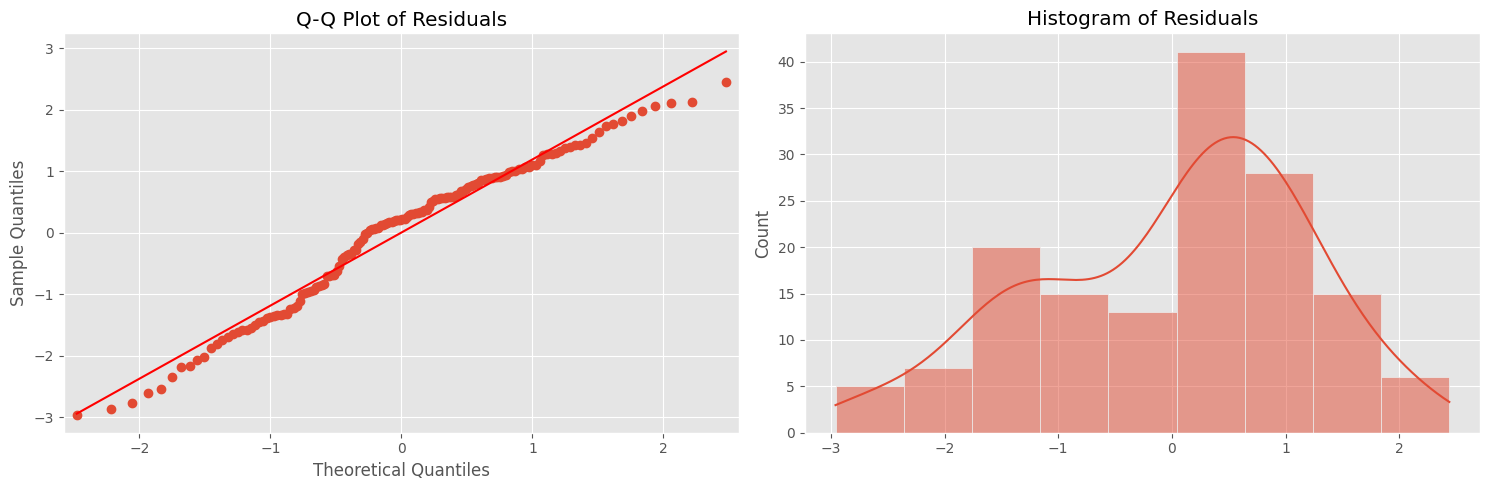

Shapiro-Wilk Test:

W Statistic: 0.97
p-value: 0.0023

The residuals do not appear to be normally distributed (p < 0.05)

Jarque-Bera Test:

JB Statistic: 6.302
p-value: 0.0428

The residuals do not appear to be normally distributed (p < 0.05)

Skewness and Kurtosis:
Skewness: -0.4377510147906273
Kurtosis: -0.49175510333437433


In [57]:
normality_realism = test_normality(realism_re_results)

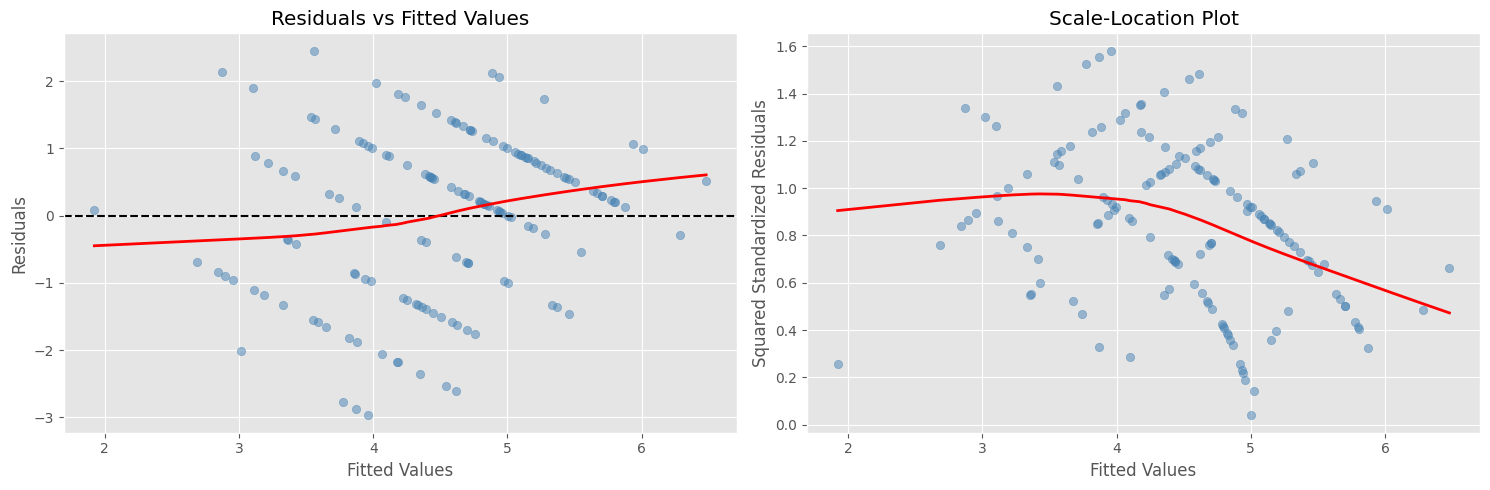

Breusch-Pagan Test Results:
Lagrange multiplier statistic: 10.4424
p-value: 0.1649
No significant evidence of heteroscedasticity (p > 0.05)


In [58]:
homoscedasticity_realism = test_homoscedasticity(realism_re_results)

- DV3: Varierty

In [59]:
## Fixed-Effects Model
variety_fe_results = fixed_effects_model(X,prepared_df['Variety_DV3'],prepared_df, tvv= True)

## Random-Effects Model
variety_re_results = random_effects_model(X,prepared_df['Variety_DV3'], prepared_df, tvv= True)

## Hausman Test
hausman_test_variety= hausman_test(variety_fe_results, variety_re_results)

Hausman Test Results:

Hausman Test Statistic: 1.0402
Hausman Test p-value: 0.7915

Interpretation:
The null is not rejected in favor of the Random Effects model


In [60]:
## Random-Effects Model
variety_re_results = random_effects_model(X,prepared_df['Variety_DV3'], prepared_df, tvv= False)
print(variety_re_results.summary())

                Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     Variety_DV3
No. Observations:     150         Method:                 REML       
No. Groups:           50          Scale:                  1.0927     
Min. group size:      3           Log-Likelihood:         -254.2403  
Max. group size:      3           Converged:              Yes        
Mean group size:      3.0                                            
---------------------------------------------------------------------
                           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------
constant                    4.321    1.142  3.783 0.000  2.082  6.559
Age                        -0.025    0.033 -0.738 0.460 -0.090  0.041
Gender                      0.339    0.396  0.855 0.393 -0.438  1.115
Gaming Time                 0.203    0.181  1.123 0.261 -0.152  0.558
condition_Random            0.047   

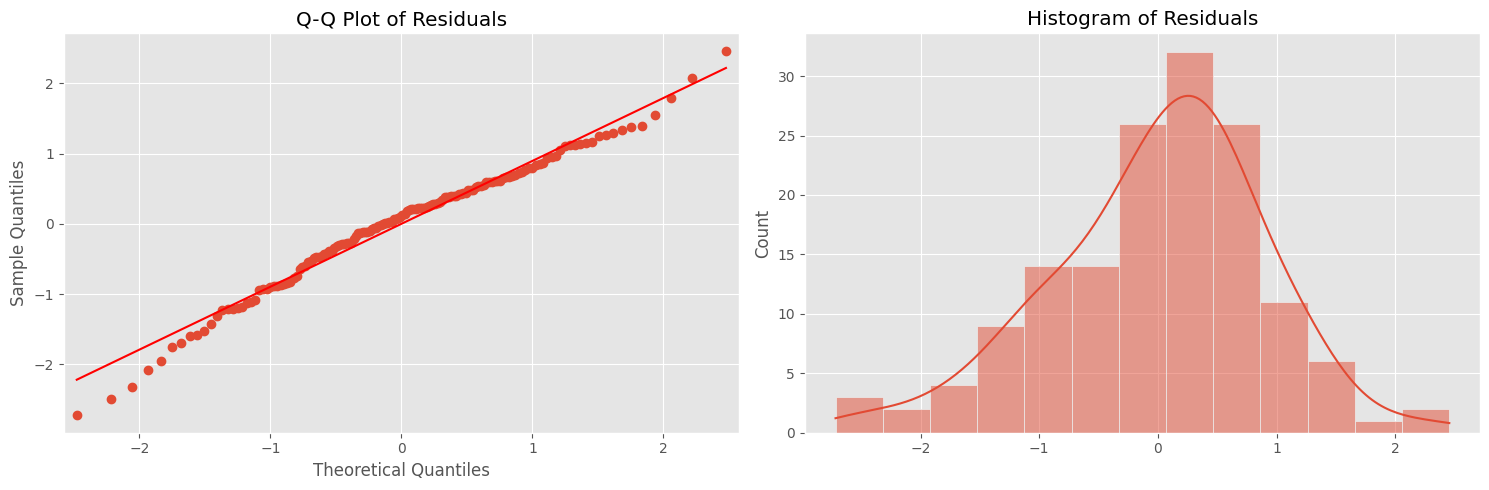

Shapiro-Wilk Test:

W Statistic: 0.9838
p-value: 0.0758

The residuals appear to be normally distributed (p > 0.05)

Jarque-Bera Test:

JB Statistic: 5.5408
p-value: 0.0626

The residuals appear to be normally distributed (p > 0.05)

Skewness and Kurtosis:
Skewness: -0.4232736174943554
Kurtosis: 0.4121654312942611


In [61]:
normality_variety = test_normality(variety_re_results)

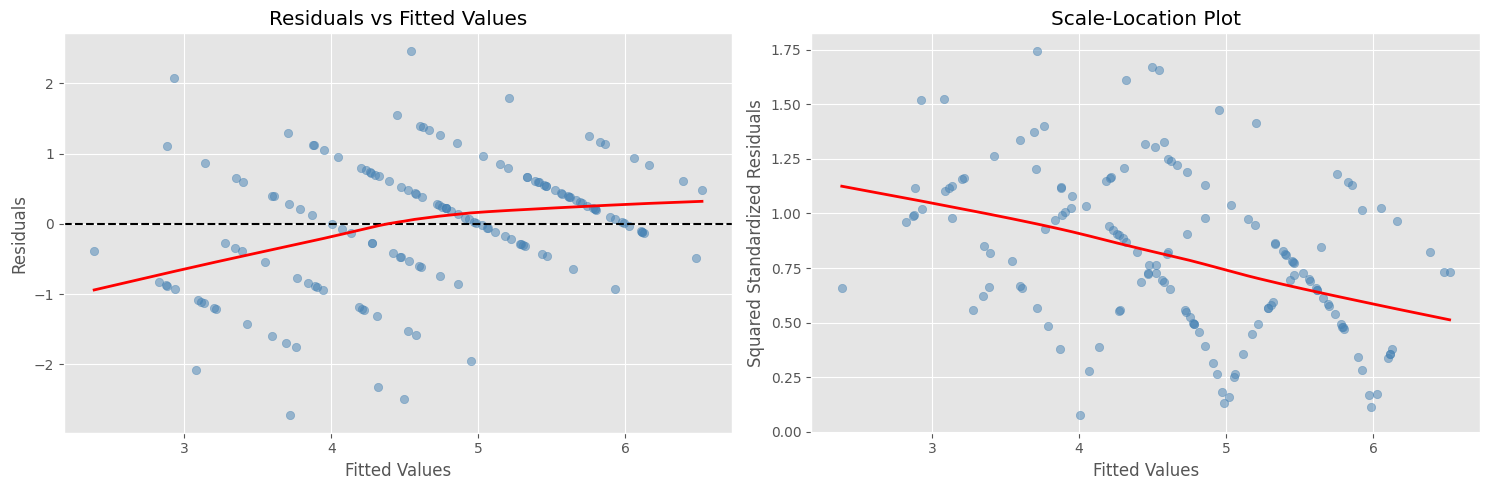

Breusch-Pagan Test Results:
Lagrange multiplier statistic: 9.3466
p-value: 0.2287
No significant evidence of heteroscedasticity (p > 0.05)


In [62]:
homoscedasticity_variety = test_homoscedasticity(variety_re_results)

## Hypothesis II

In [63]:
## Fitting model with interactions
def random_effects_model_with_interactions(iv, dv, df):
    
    ## Rename columns for consistency
    iv = iv.rename(columns = {
        'Gaming Knowledge_std': 'Gaming_Knowledge_std', 
        'Gaming Time_std': 'Gaming_Time_std',
        'condition_Machine-learning': 'condition_Machine_learning',
        'condition_Rule-based': 'condition_Rule_based'
    })
 
    
    ## Set intereaction variables
    interaction_vars = ['Gaming_Knowledge_std', 'Challenge_std']
    
    ## Create interaction terms
    for condition in ['condition_Machine_learning', 'condition_Rule_based']:
        if condition in iv.columns:
            for var in interaction_vars:
                if var in iv.columns:
                    ## Create interaction term
                    interaction_name = f"{condition}_{var}"
                    iv[interaction_name] = iv[condition] * iv[var]
    
    
    ## Add constant
    iv.insert(0, 'constant', 1.0)
    
    ## Fit the random-intercepts model
    model_re = MixedLM(endog=dv,
                      exog=iv,
                      groups=np.array(df['ParticipantID']))
    
    results = model_re.fit()
    
    return results

- DV1: Engagement

In [64]:
## Random-Effects Model
engagement_re_interactions_results = random_effects_model_with_interactions(
    X, 
    prepared_df['Engagement_DV1'], 
    prepared_df)

print(engagement_re_interactions_results.summary())

                          Mixed Linear Model Regression Results
Model:                      MixedLM           Dependent Variable:           Engagement_DV1
No. Observations:           150               Method:                       REML          
No. Groups:                 50                Scale:                        0.7240        
Min. group size:            3                 Log-Likelihood:               -223.9634     
Max. group size:            3                 Converged:                    Yes           
Mean group size:            3.0                                                           
------------------------------------------------------------------------------------------
                                                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------------------
constant                                         6.092    0.893  6.819 0.000  4.341  7.843
Age                       

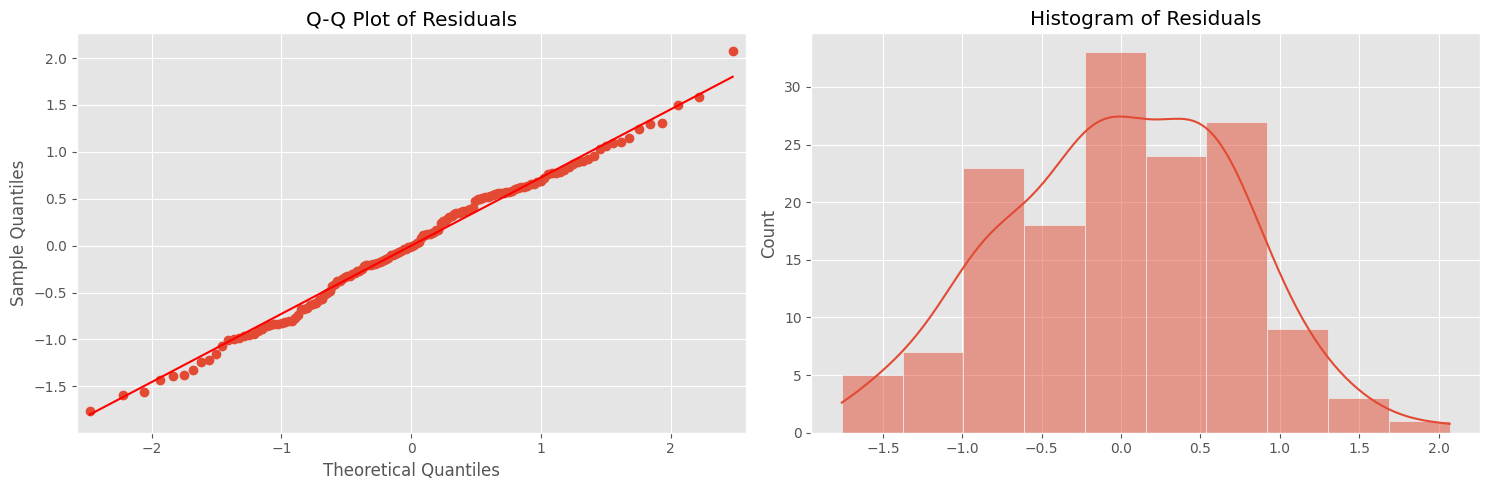

Shapiro-Wilk Test:

W Statistic: 0.9925
p-value: 0.6218

The residuals appear to be normally distributed (p > 0.05)

Jarque-Bera Test:

JB Statistic: 0.8876
p-value: 0.6416

The residuals appear to be normally distributed (p > 0.05)

Skewness and Kurtosis:
Skewness: -0.07303944623442926
Kurtosis: -0.34739180417141613


In [65]:
normality_engagement_interactions = test_normality(engagement_re_interactions_results)

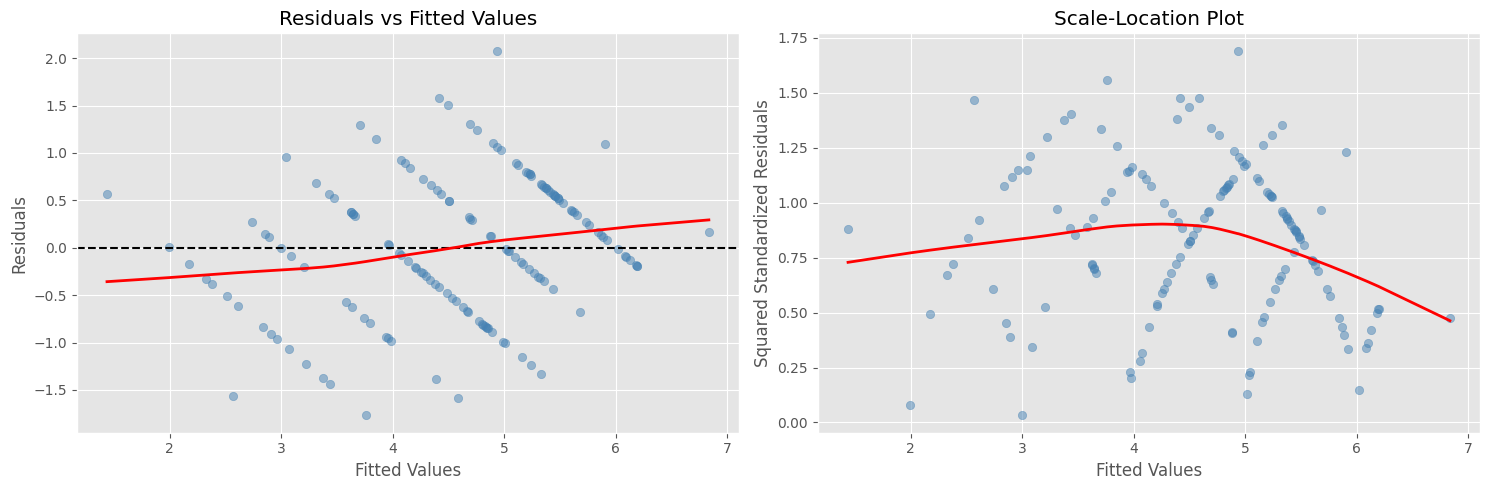

Breusch-Pagan Test Results:
Lagrange multiplier statistic: 7.3395
p-value: 0.6018
No significant evidence of heteroscedasticity (p > 0.05)


In [66]:
homoscedasticity_engagement_interactions = test_homoscedasticity(engagement_re_interactions_results)

- DV2: Realism

In [67]:
## Random-Effects Model
realism_re_interactions_results = random_effects_model_with_interactions(
    X, 
    prepared_df['Realism_DV2'], 
    prepared_df
    )

print(realism_re_interactions_results.summary())

                          Mixed Linear Model Regression Results
Model:                       MixedLM            Dependent Variable:            Realism_DV2
No. Observations:            150                Method:                        REML       
No. Groups:                  50                 Scale:                         1.7033     
Min. group size:             3                  Log-Likelihood:                -267.1054  
Max. group size:             3                  Converged:                     Yes        
Mean group size:             3.0                                                          
------------------------------------------------------------------------------------------
                                                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------------------
constant                                         4.559    0.952  4.788 0.000  2.693  6.425
Age                       

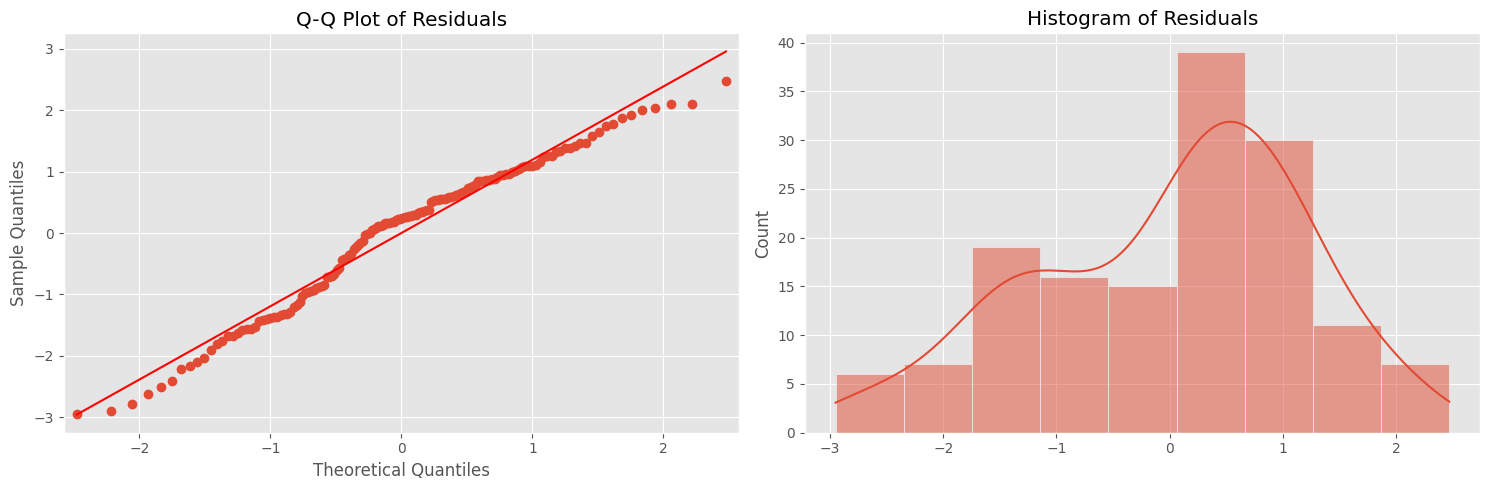

Shapiro-Wilk Test:

W Statistic: 0.9701
p-value: 0.0024

The residuals do not appear to be normally distributed (p < 0.05)

Jarque-Bera Test:

JB Statistic: 6.2373
p-value: 0.0442

The residuals do not appear to be normally distributed (p < 0.05)

Skewness and Kurtosis:
Skewness: -0.4353228414251092
Kurtosis: -0.48983542333124186


In [68]:
normality_realism_interactions = test_normality(realism_re_interactions_results)

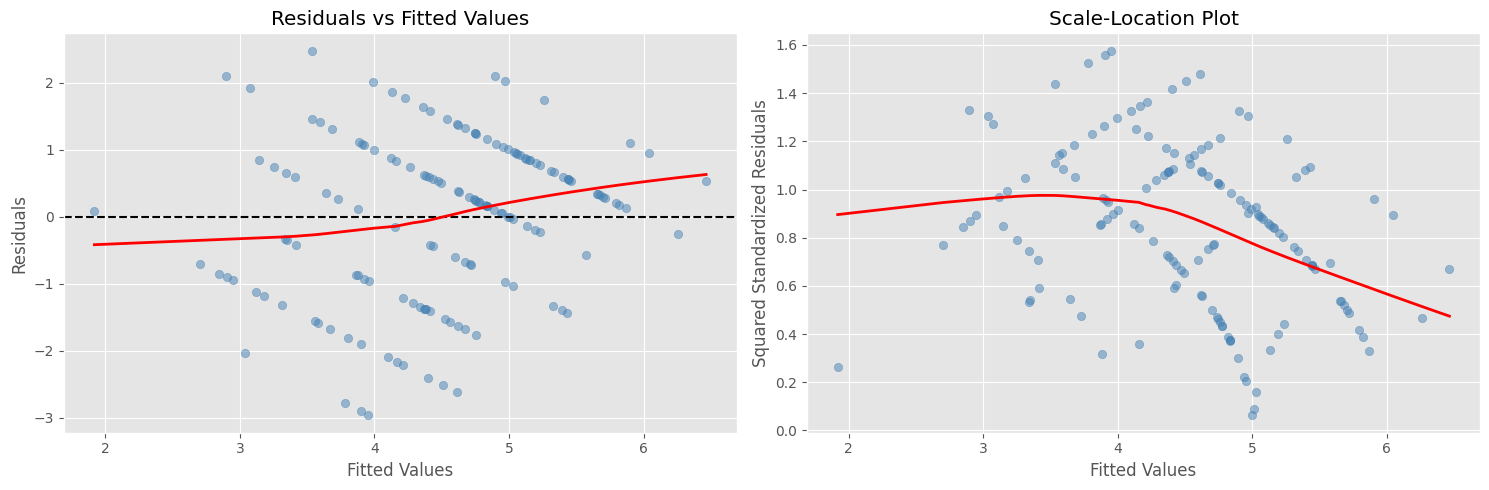

Breusch-Pagan Test Results:
Lagrange multiplier statistic: 10.856
p-value: 0.2857
No significant evidence of heteroscedasticity (p > 0.05)


In [69]:
homoscedasticity_realism_interactions = test_homoscedasticity(realism_re_interactions_results)

- DV3: Variety

In [70]:
## Random-Effects Model
variety_re_interactions_results = random_effects_model_with_interactions(
    X, 
    prepared_df['Variety_DV3'], 
    prepared_df)

print(variety_re_interactions_results.summary())

                          Mixed Linear Model Regression Results
Model:                       MixedLM            Dependent Variable:            Variety_DV3
No. Observations:            150                Method:                        REML       
No. Groups:                  50                 Scale:                         1.0231     
Min. group size:             3                  Log-Likelihood:                -251.3051  
Max. group size:             3                  Converged:                     Yes        
Mean group size:             3.0                                                          
------------------------------------------------------------------------------------------
                                                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------------------
constant                                         4.345    1.137  3.820 0.000  2.116  6.575
Age                       

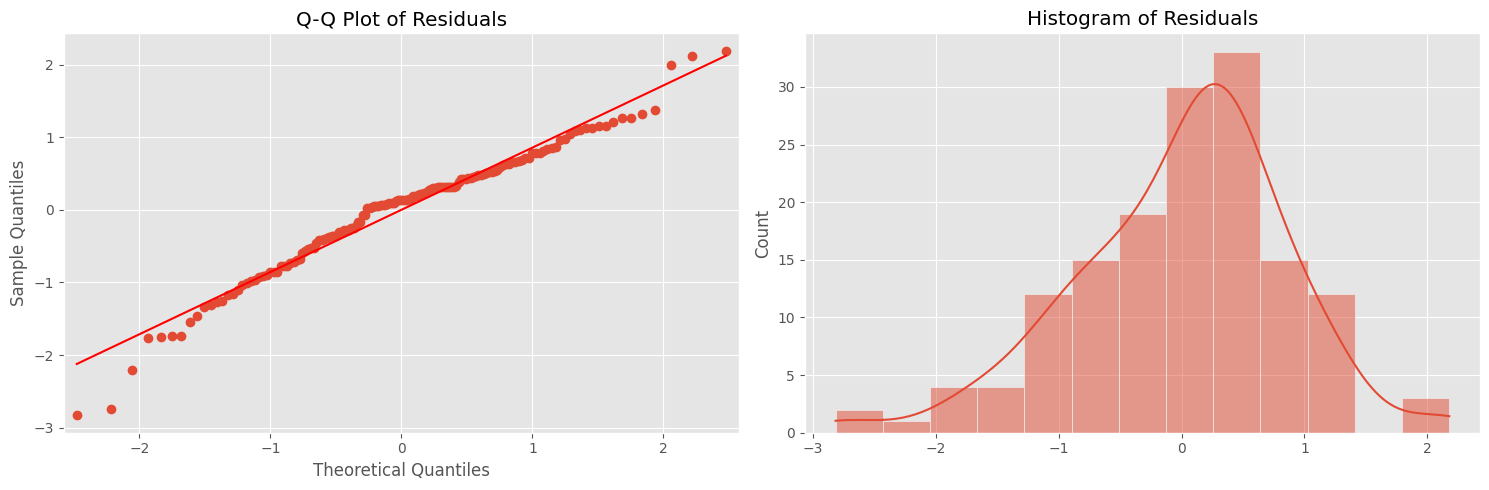

Shapiro-Wilk Test:

W Statistic: 0.9742
p-value: 0.0064

The residuals do not appear to be normally distributed (p < 0.05)

Jarque-Bera Test:

JB Statistic: 10.83
p-value: 0.0044

The residuals do not appear to be normally distributed (p < 0.05)

Skewness and Kurtosis:
Skewness: -0.5156862283911353
Kurtosis: 0.8179715672846832


In [71]:
normality_variety_interactions = test_normality(variety_re_interactions_results)

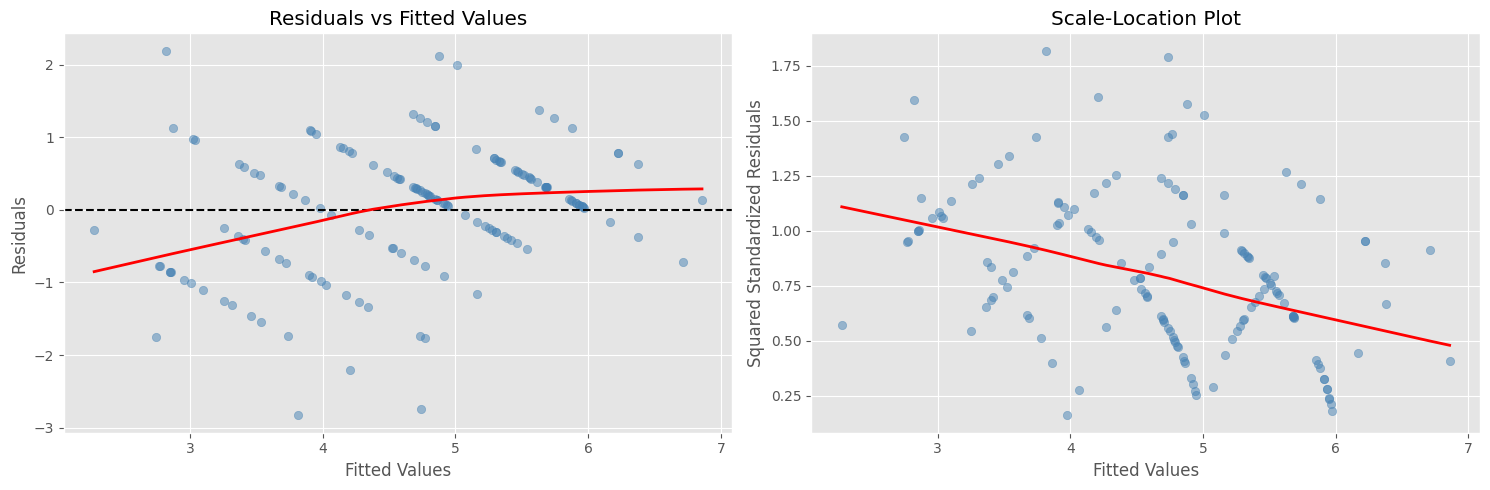

Breusch-Pagan Test Results:
Lagrange multiplier statistic: 8.3907
p-value: 0.4953
No significant evidence of heteroscedasticity (p > 0.05)


In [72]:
homoscedasticity_variety_interactions = test_homoscedasticity(variety_re_interactions_results)

Random Effects models with only controls

In [73]:
def random_effects_model_controls(iv, dv, df):
    
    iv = iv.rename(columns = {'Gaming Knowledge_std': 'Gaming_Knowledge_std', 
                        'Gaming Time': 'Gaming_Time'})
    
    ## Only controls 
    iv = iv[['Age','Gender','Gaming_Knowledge_std','Challenge_std','Gaming_Time']]
    
    ## ensure predictors and outcome are numeric
    iv = iv.apply(lambda col: np.array(col).astype(float))
    y  = dv.apply(lambda col: np.array(col).astype(float))

    ## insert constant at position 0
    iv.insert(0, 'constant', 1.0)

    ## fit the random‐intercepts model
    model_re = MixedLM(endog=y,
                       exog=iv,
                       groups=np.array(df['ParticipantID']))
    
    results = model_re.fit()
    return results

In [74]:
## Random-Effects Model
engagement_re_controls_results = random_effects_model_controls(X,prepared_df['Engagement_DV1'], prepared_df)

print(engagement_re_controls_results.summary())

             Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  Engagement_DV1
No. Observations:  150      Method:              REML          
No. Groups:        50       Scale:               0.9561        
Min. group size:   3        Log-Likelihood:      -237.1077     
Max. group size:   3        Converged:           Yes           
Mean group size:   3.0                                         
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
constant              5.824    0.909  6.409 0.000  4.043  7.605
Age                  -0.035    0.027 -1.325 0.185 -0.087  0.017
Gender               -0.228    0.317 -0.719 0.472 -0.848  0.393
Gaming_Knowledge_std -0.037    0.161 -0.231 0.818 -0.354  0.279
Challenge_std         0.691    0.110  6.309 0.000  0.477  0.906
Gaming_Time          -0.073    0.145 -0.503 0.615 -0.

In [75]:
## Random-Effects Model
realism_re_controls_results = random_effects_model_controls(X,prepared_df['Realism_DV2'], prepared_df)

print(realism_re_controls_results.summary())

             Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   Realism_DV2
No. Observations:   150       Method:               REML       
No. Groups:         50        Scale:                1.9223     
Min. group size:    3         Log-Likelihood:       -273.1737  
Max. group size:    3         Converged:            Yes        
Mean group size:    3.0                                        
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
constant              4.083    0.941  4.338 0.000  2.238  5.928
Age                  -0.025    0.027 -0.929 0.353 -0.079  0.028
Gender                0.331    0.327  1.010 0.313 -0.311  0.972
Gaming_Knowledge_std -0.104    0.167 -0.622 0.534 -0.431  0.223
Challenge_std         0.601    0.134  4.499 0.000  0.339  0.863
Gaming_Time           0.340    0.151  2.254 0.024  0.

In [76]:
## Random-Effects Model
variety_re_controls_results = random_effects_model_controls(X,prepared_df['Variety_DV3'], prepared_df)

print(variety_re_controls_results.summary())

             Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   Variety_DV3
No. Observations:   150       Method:               REML       
No. Groups:         50        Scale:                1.1020     
Min. group size:    3         Log-Likelihood:       -254.2798  
Max. group size:    3         Converged:            Yes        
Mean group size:    3.0                                        
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
constant              4.410    1.137  3.879 0.000  2.182  6.639
Age                  -0.024    0.033 -0.726 0.468 -0.089  0.041
Gender                0.349    0.397  0.881 0.378 -0.428  1.127
Gaming_Knowledge_std -0.036    0.202 -0.178 0.859 -0.432  0.360
Challenge_std         0.577    0.124  4.638 0.000  0.333  0.820
Gaming_Time           0.211    0.181  1.166 0.243 -0.